In [10]:
import subprocess
import os
from os import path
import ipywidgets as widgets
from ipywidgets import Text, Button, VBox, HBox, Layout, Checkbox
from IPython.display import clear_output
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt


def runTool(button):
    clear_output(wait=True)
    display(inputs)
    
    
    #Args for PIN
    PIN_DIRECTORY = "/setup/pintool/pin.sh"
    TOOL_DIRECTORY = "/setup/converter/trace_tool.so"
    INFILE_EXECUTABLE = path.expanduser(infile.value)
    OUTFILE_DIRECTORY = path.expanduser("/setup/converter/outfiles")
    CACHE_SIZE = cache.value
    NUM_LINES = lines.value
    BLOCK_SIZE = block.value
    
    if(not CACHE_SIZE.isdigit() or not NUM_LINES.isdigit() or not BLOCK_SIZE.isdigit()):
        print("Cache Lines, Lines to Output, and Block Size must be positive integers")
        return
    
    if(not path.isfile(INFILE_EXECUTABLE)):
        print("Executable \"{}\" Not Found".format(INFILE_EXECUTABLE))
        return


    
    print("Running {} with Cache Lines={} and Block Size={}B for Number of Lines={}".format(INFILE_EXECUTABLE, CACHE_SIZE, BLOCK_SIZE, NUM_LINES))
    
    args = [
        PIN_DIRECTORY,
        "-ifeellucky",
        "-injection",
        "child",
        "-t",
        TOOL_DIRECTORY,
        "-o",
        OUTFILE_DIRECTORY,
        "-c",
        CACHE_SIZE,
        "-m",
        NUM_LINES,
        "-l",
        BLOCK_SIZE,
        "--",
        INFILE_EXECUTABLE
    ]
    
    
    try:
        df.close_files()
    except:
        pass
    
    #print(OUTFILE_DIRECTORY)
    subprocess.run(args,capture_output=True)
    #print("Finished sub")

    %run generateGraph.py
    
    
    
showFullDescription = {'description_width': '150px'}

cache = Text(
            value='4096',
            placeholder='',
            description='Cache Lines:',
            style=showFullDescription,
            layout= Layout(width='90%'),
            disabled=False
        )
lines = Text(
            value='1000000000',
            placeholder='',
            description='Lines to Output:',
            style=showFullDescription,
            layout= Layout(width='90%'),
            disabled=False
        )

block = Text(
            value='64',
            placeholder='',
            description='Block Size (Bytes):',
            style=showFullDescription,
            layout= Layout(width='90%'),
            disabled=False
        )

infile = Text(
            value='',
            placeholder='',
            description='Executable Path',
            style=showFullDescription,
            layout= Layout(width='90%'),
            disabled=False
        )

run = Button(
        description='Run',
        disabled=False,
        button_style='',
        layout= Layout(margin='10px 0px 0px 0px', height='40px', width='90%', border='1px solid black'),
        style={'button_color': 'lightgray'}
    )


inputs = VBox(
            children=[cache, lines, block, infile, run],
            layout=Layout(width="400px")
        )


run.on_click(runTool)
display(inputs)


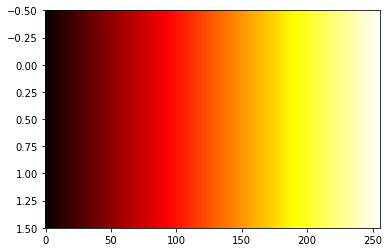

In [8]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
axes = plt.gca()
axes.imshow(gradient, aspect='auto', cmap=plt.get_cmap('hot'))
plt.show()